In [2]:
# import libraries and data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("data.csv")

<Figure size 800x600 with 0 Axes>

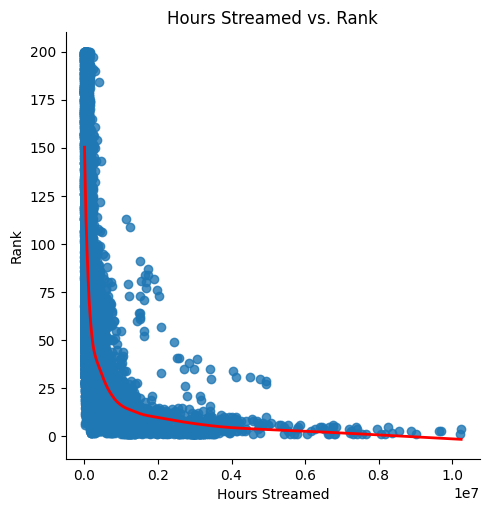

In [ ]:
plt.figure(figsize=(8, 6))
sns.lmplot(data=df, x='Hours_streamed', y='Rank', lowess=True, line_kws={'color': 'red', 'linewidth': 2})
plt.gca().invert_yaxis()
plt.title("Hours Streamed vs. Rank")
plt.xlabel("Hours Streamed")
plt.ylabel("Rank")
plt.show()

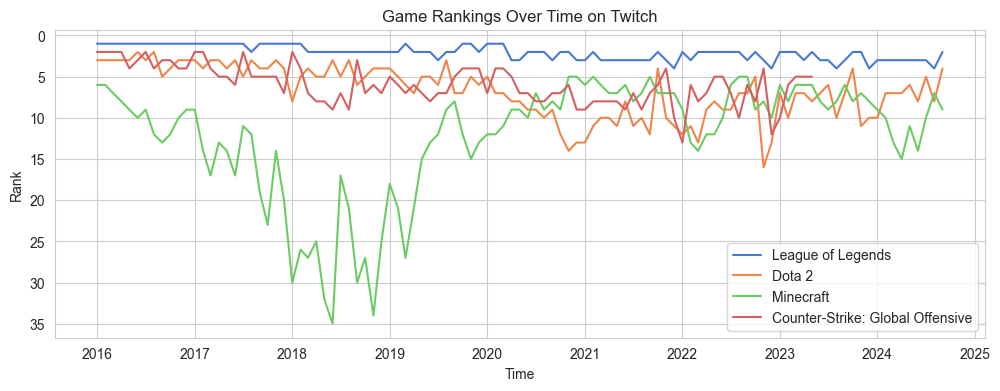

In [21]:
df["Date"] = pd.to_datetime(df["Year"].astype(str) + "-" + df["Month"].astype(str) + "-01")
games = ["League of Legends", "Dota 2", "Minecraft", "Counter-Strike: Global Offensive"]

sns.set_style("whitegrid")
sns.set_palette("muted")

colors = ["blue", "green", "orange", "red"]
plt.figure(figsize=(12, 4))
for i, game in enumerate(games):
    game_df = df[df["Game"] == game]
    plt.plot(game_df["Date"], game_df["Rank"], linestyle="-", label=game)
plt.gca().invert_yaxis()
plt.xlabel("Time")
plt.ylabel("Rank")
plt.title("Game Rankings Over Time on Twitch")
plt.legend()
plt.grid(True)
plt.show()


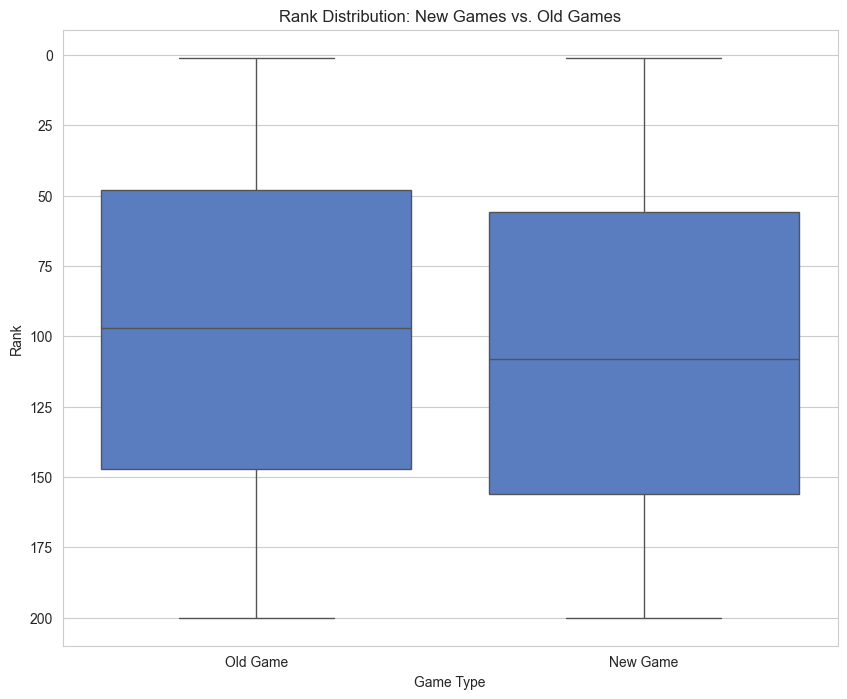

In [30]:
plt.figure(figsize=(10, 8))
sns.boxplot(x=df["New_Game"], y=df["Rank"])
plt.xticks(ticks=[0, 1], labels=["Old Game", "New Game"])
plt.xlabel("Game Type")
plt.ylabel("Rank")
plt.title("Rank Distribution: New Games vs. Old Games")
plt.gca().invert_yaxis()
plt.show()


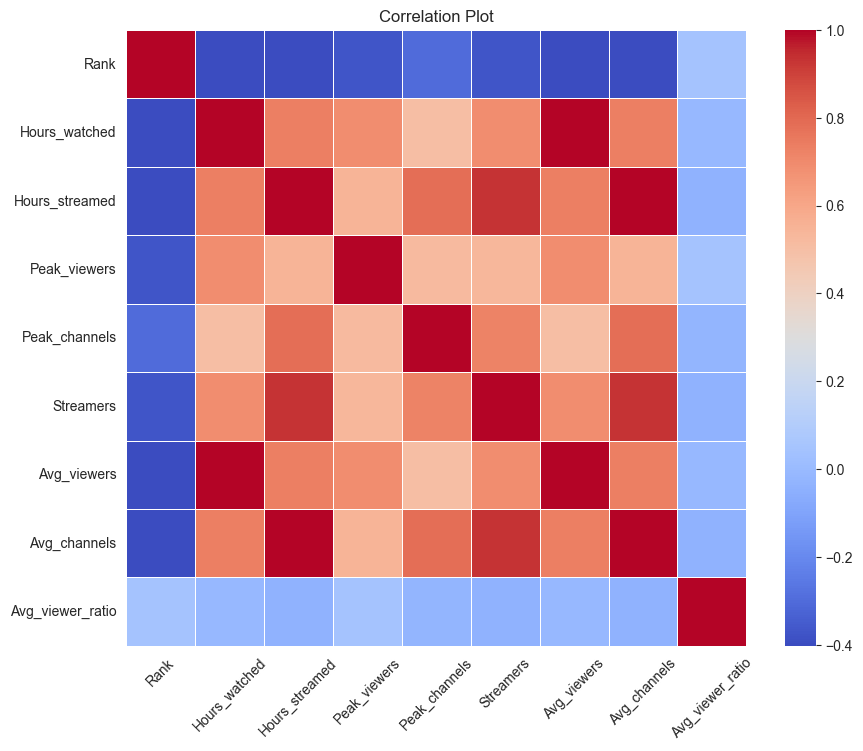

In [28]:
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns
numeric_cols = numeric_cols.drop(["Month", "Year", "Wrong", "New_Game"], errors="ignore")
corr_matrix = df[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", linewidths=0.5)
plt.xticks(rotation=45)
plt.title("Correlation Plot")
plt.show()

In [31]:
print(df.columns)

Index(['Rank', 'Game', 'Month', 'Year', 'Hours_watched', 'Hours_streamed',
       'Peak_viewers', 'Peak_channels', 'Streamers', 'Avg_viewers',
       'Avg_channels', 'Avg_viewer_ratio', 'Genre', 'Release_Year',
       'Release_Month', 'New_Game', 'Wrong', 'rank_category', 'Date'],
      dtype='object')
